In [10]:
import tensorflow as tf
import numpy as np
import cv2

In [17]:
(train_x, train_y),(test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = tf.convert_to_tensor(train_x,dtype=tf.float32)
train_x = tf.pad(train_x,[[0,0],[2,2],[2,2]],"CONSTANT",0) # 外圍填充
train_x = train_x / 255 # 圖像歸一化 0~1
train_x = tf.expand_dims(train_x,-1)
train_y = tf.one_hot(train_y, depth=10)

test_x = tf.convert_to_tensor(test_x,dtype=tf.float32)
test_x = tf.pad(test_x,[[0,0],[2,2],[2,2]],"CONSTANT",0) # 外圍填充
test_x = test_x / 255 # 圖像歸一化 0~1
test_x = tf.expand_dims(test_x,-1)
test_y = tf.one_hot(test_y, depth=10)
print(test_x.shape)

(10000, 32, 32, 1)


In [3]:

'''
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomRotation(0.14),#angel = ( -0.14*2pi , +0.14*2pi )
  tf.keras.layers.RandomZoom(0.3),
])

  # tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  # tf.keras.layers.experimental.preprocessing.RandomRotation(0.14),  
  # tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
  # 已改為下列用法了  

# 定义数据处理函数
def preprocess_data(images, labels):
    images = tf.convert_to_tensor(images,dtype=tf.uint8)
    images = tf.expand_dims(images,-1)
    images = tf.pad(images,[[2,2],[2,2],[0,0]],"CONSTANT",0)
    # print(images)
    images = data_augmentation(images)
    # 归一化图像像素值 0~1
    images = tf.cast(images, tf.float32) / 255.0
    print('shape of augmentation: ',images.shape)
    print('dtype of augmentation: ',images.dtype)
    # images = tf.squeeze(images,-1)
    print('shape of augmentation: ',images.shape)
    print('dtype of augmentation: ',images.dtype)
    # 进行图像增强
    labels = tf.one_hot(labels, depth=10)
    return images, labels


(train_x, train_y),(test_x, test_y) = tf.keras.datasets.mnist.load_data()
# train_x = tf.expand_dims(train_x, -1)
# test_x = tf.expand_dims(test_x, -1)
# images = tf.pad(train_x,[[0,0],[2,2],[2,2]],"CONSTANT",0)
# images = tf.pad(train_x,[[0,0],[2,2],[2,2]],"CONSTANT",0)
# 创建训练数据集
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, (train_y, train_y, train_y, train_y, train_y, train_y)))
print(train_dataset)
train_dataset = train_dataset.shuffle(buffer_size=10000).map(preprocess_data).batch(32)
# 
# 创建测试数据集
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, (test_y, test_y, test_y, test_y, test_y, test_y)))
test_dataset = test_dataset.map(preprocess_data)

print(train_dataset.element_spec)
# print(train_dataset.)
# (train_x, train_y) = train_dataset.as_numpy_iterator()
# print('shape of augmentation: ',train_x.shape)
# print('dtype of augmentation: ',train_x.dtype)
'''

'\ndata_augmentation = tf.keras.Sequential([\n  tf.keras.layers.RandomRotation(0.14),#angel = ( -0.14*2pi , +0.14*2pi )\n  tf.keras.layers.RandomZoom(0.3),\n])\n\n  # tf.keras.layers.experimental.preprocessing.RandomFlip(\'horizontal\'),\n  # tf.keras.layers.experimental.preprocessing.RandomRotation(0.14),  \n  # tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),\n  # 已改為下列用法了  \n\n# 定义数据处理函数\ndef preprocess_data(images, labels):\n    images = tf.convert_to_tensor(images,dtype=tf.uint8)\n    images = tf.expand_dims(images,-1)\n    images = tf.pad(images,[[2,2],[2,2],[0,0]],"CONSTANT",0)\n    # print(images)\n    images = data_augmentation(images)\n    # 归一化图像像素值 0~1\n    images = tf.cast(images, tf.float32) / 255.0\n    print(\'shape of augmentation: \',images.shape)\n    print(\'dtype of augmentation: \',images.dtype)\n    # images = tf.squeeze(images,-1)\n    print(\'shape of augmentation: \',images.shape)\n    print(\'dtype of augmentation: \',images.dtype)\n    # 进行图像增强\n 

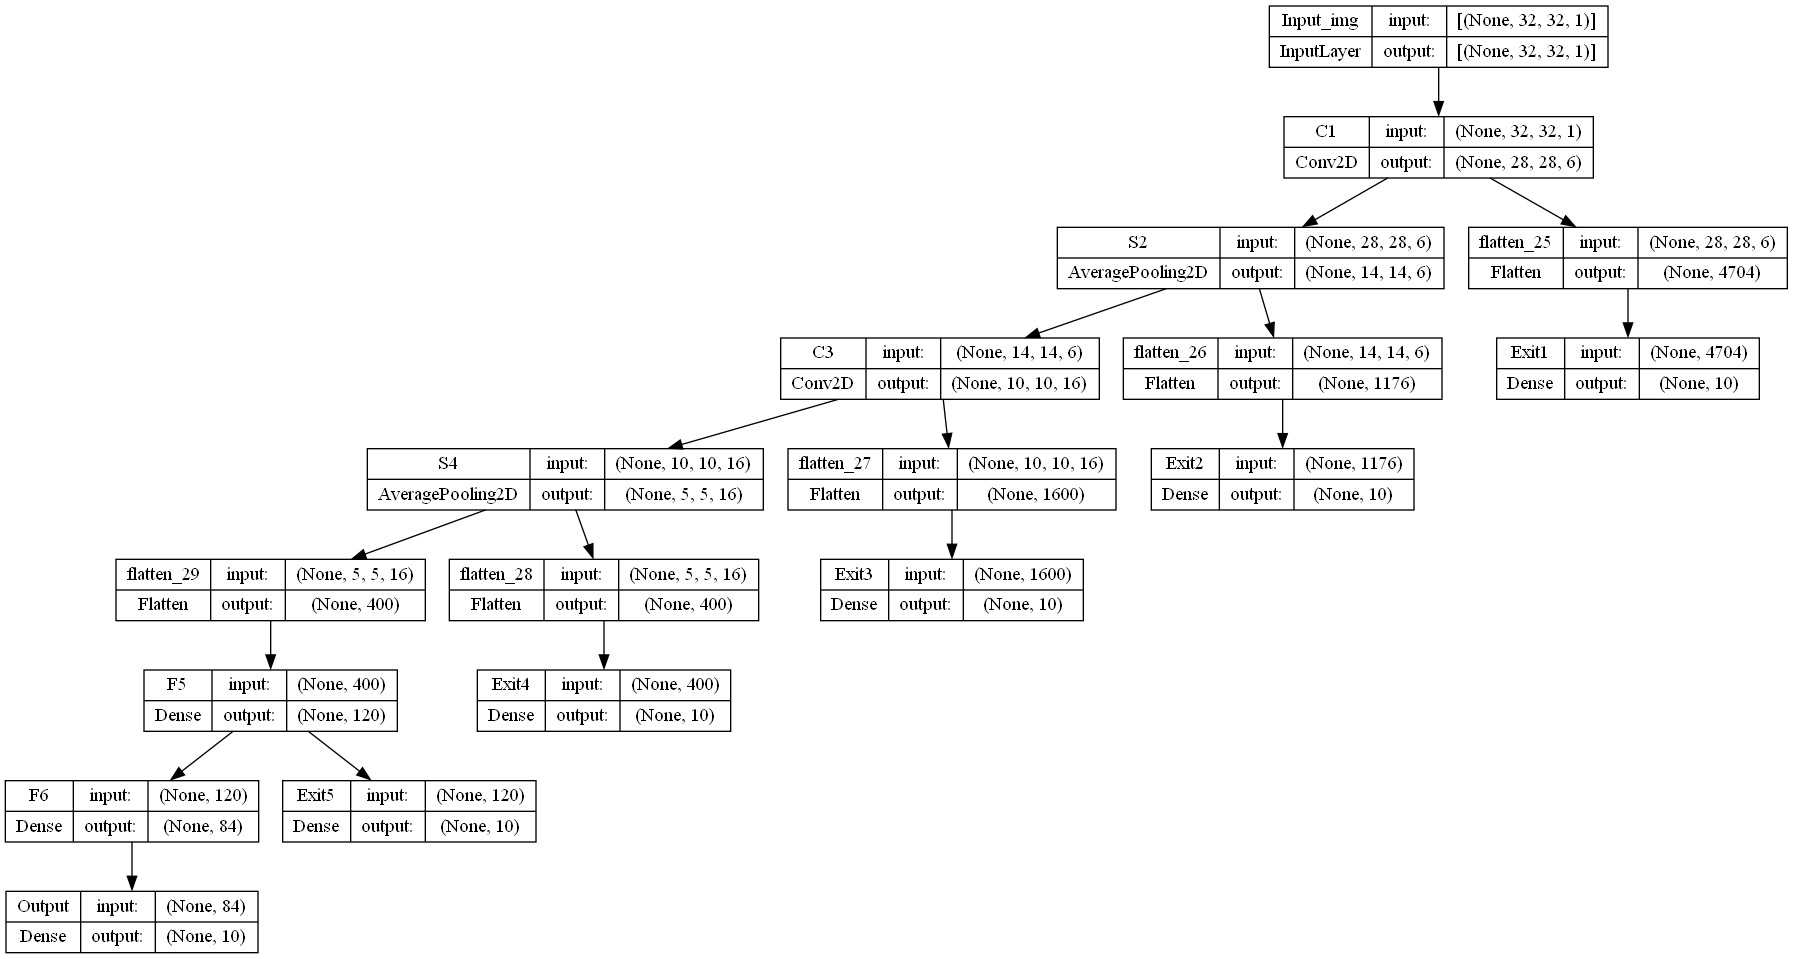

In [18]:
model_input = tf.keras.Input(shape=(32, 32, 1), name="Input_img")

x = tf.keras.layers.Conv2D(6,kernel_size=5, activation="relu",name="C1")(model_input)
Exit_1_flatten = tf.keras.layers.Flatten()(x)
Exit_output_1 = tf.keras.layers.Dense(10,activation='softmax',name="Exit1")(Exit_1_flatten)
# Exit 1

x = tf.keras.layers.AveragePooling2D(pool_size=2,strides=2,name="S2")(x)
Exit_2_flatten = tf.keras.layers.Flatten()(x)
Exit_output_2 = tf.keras.layers.Dense(10,activation='softmax',name="Exit2")(Exit_2_flatten)
# Exit 2 

x = tf.keras.layers.Conv2D(16,kernel_size=5,activation="relu",name="C3")(x)
Exit_3_flatten = tf.keras.layers.Flatten()(x)
Exit_output_3 = tf.keras.layers.Dense(10,activation='softmax',name="Exit3")(Exit_3_flatten)
# Exit 3

x = tf.keras.layers.AveragePooling2D(pool_size=2,strides=2,name="S4")(x)
Exit_4_flatten = tf.keras.layers.Flatten()(x)
Exit_output_4 = tf.keras.layers.Dense(10,activation='softmax',name="Exit4")(Exit_4_flatten)
# Exit 4

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120,activation='relu',name="F5")(x)
Exit_output_5 = tf.keras.layers.Dense(10,activation='softmax',name="Exit5")(x)
# Exit 5

x = tf.keras.layers.Dense(84,activation='relu',name="F6")(x)
model_output = tf.keras.layers.Dense(10,activation='softmax',name="Output")(x)


test_model = tf.keras.Model(inputs=model_input, outputs=[Exit_output_1, Exit_output_2, Exit_output_3, Exit_output_4, Exit_output_5, model_output],name="test_model")
tf.keras.utils.plot_model(test_model, to_file=".\\arch_image\my_first_model_with_shape_info.png", show_shapes=True)


In [19]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
test_model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"]) # 定義所要採用的loss funtion, optimizer, metrics
history = test_model.fit(datagen.flow(train_x,train_y,batch_size=32),steps_per_epoch=len(train_x)/32,epochs=16,validation_data=(test_x,test_y))

Epoch 1/16
1875/1875 [==============================] - 22s 11ms/step - loss: 7.5618 - Exit1_loss: 1.5912 - Exit2_loss: 1.6788 - Exit3_loss: 1.1349 - Exit4_loss: 1.2999 - Exit5_loss: 0.9534 - Output_loss: 0.9036 - Exit1_accuracy: 0.4632 - Exit2_accuracy: 0.4325 - Exit3_accuracy: 0.6333 - Exit4_accuracy: 0.5833 - Exit5_accuracy: 0.6902 - Output_accuracy: 0.7010 - val_loss: 2.6027 - val_Exit1_loss: 0.7542 - val_Exit2_loss: 0.8608 - val_Exit3_loss: 0.2822 - val_Exit4_loss: 0.3555 - val_Exit5_loss: 0.1888 - val_Output_loss: 0.1611 - val_Exit1_accuracy: 0.7905 - val_Exit2_accuracy: 0.8110 - val_Exit3_accuracy: 0.9267 - val_Exit4_accuracy: 0.9360 - val_Exit5_accuracy: 0.9455 - val_Output_accuracy: 0.9505
Epoch 2/16
1875/1875 [==============================] - 19s 10ms/step - loss: 4.9981 - Exit1_loss: 1.2957 - Exit2_loss: 1.3455 - Exit3_loss: 0.6939 - Exit4_loss: 0.7904 - Exit5_loss: 0.4503 - Output_loss: 0.4222 - Exit1_accuracy: 0.5867 - Exit2_accuracy: 0.5721 - Exit3_accuracy: 0.7910 - Exi

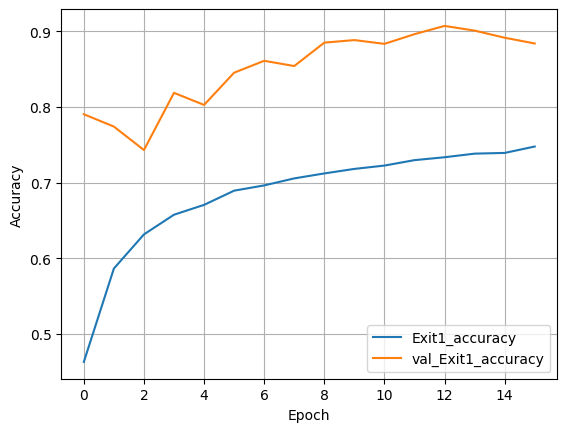

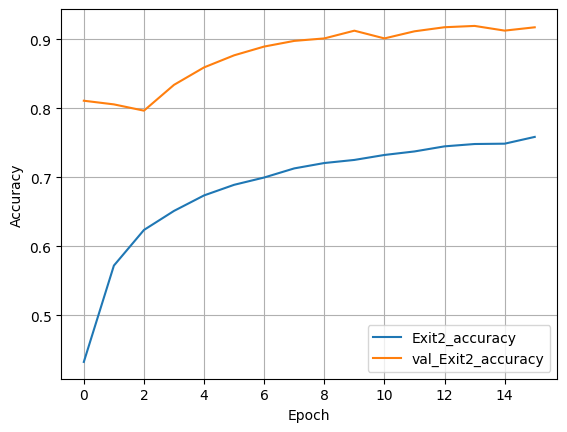

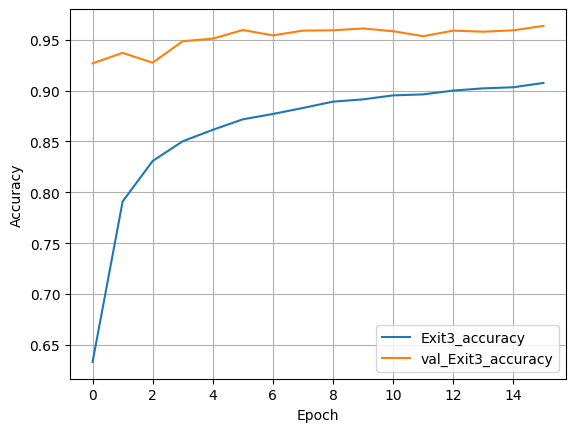

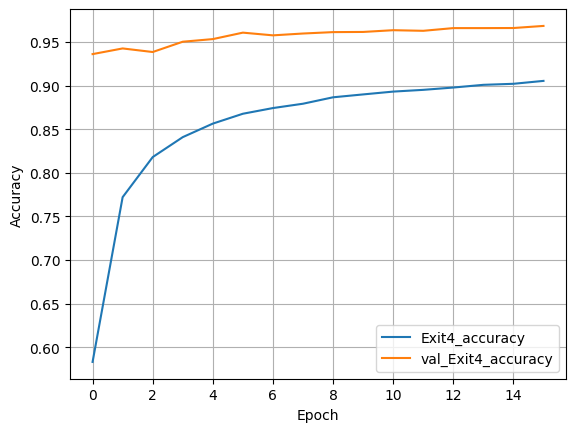

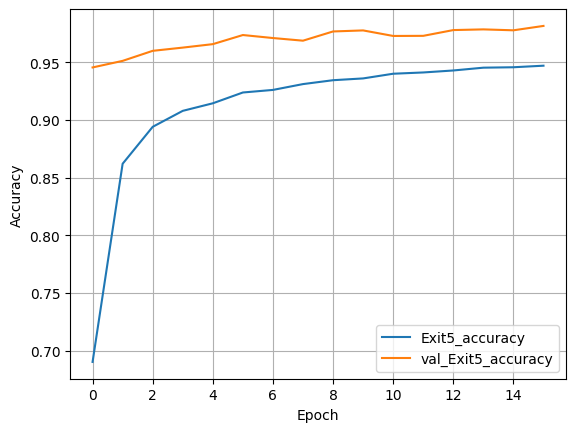

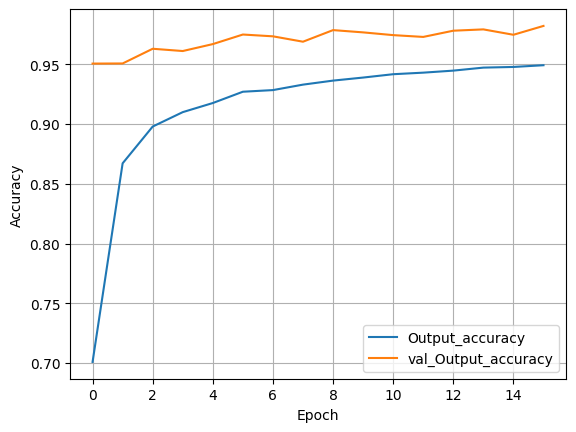

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['Exit1_accuracy'], label='Exit1_accuracy')
plt.plot(history.history['val_Exit1_accuracy'], label = 'val_Exit1_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig(".\\arch_image\Exit_1.png")
plt.show()


plt.plot(history.history['Exit2_accuracy'], label='Exit2_accuracy')
plt.plot(history.history['val_Exit2_accuracy'], label = 'val_Exit2_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig(".\\arch_image\Exit_2.png")
plt.show()


plt.plot(history.history['Exit3_accuracy'], label='Exit3_accuracy')
plt.plot(history.history['val_Exit3_accuracy'], label = 'val_Exit3_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig(".\\arch_image\Exit_3.png")
plt.show()


plt.plot(history.history['Exit4_accuracy'], label='Exit4_accuracy')
plt.plot(history.history['val_Exit4_accuracy'], label = 'val_Exit4_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig(".\\arch_image\Exit_4.png")
plt.show()


plt.plot(history.history['Exit5_accuracy'], label='Exit5_accuracy')
plt.plot(history.history['val_Exit5_accuracy'], label = 'val_Exit5_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig(".\\arch_image\Exit_5.png")
plt.show()


plt.plot(history.history['Output_accuracy'], label='Output_accuracy')
plt.plot(history.history['val_Output_accuracy'], label = 'val_Output_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig(".\\arch_image\Final_output.png")
plt.show()



In [24]:
Exit_input_1 = tf.keras.Input(shape=(32, 32, 1), name="Input_img")
C1_output = tf.keras.layers.Conv2D(6,kernel_size=5, activation="relu",name="C1")(Exit_input_1)
Exit_1_flatten = tf.keras.layers.Flatten()(C1_output)
Exit_output_1 = tf.keras.layers.Dense(10,activation='softmax',name="Exit1")(Exit_1_flatten)
# Exit 1


Exit_input_2 = tf.keras.Input(shape=(28, 28, 6), name="C1_params")
S2_output = tf.keras.layers.AveragePooling2D(pool_size=2,strides=2,name="S2")(Exit_input_2)
Exit_2_flatten = tf.keras.layers.Flatten()(S2_output)
Exit_output_2 = tf.keras.layers.Dense(10,activation='softmax',name="Exit2")(Exit_2_flatten)
# Exit 2 

Exit_input_3 = tf.keras.Input(shape=(14, 14, 6), name="S2_params")
C3_output = tf.keras.layers.Conv2D(16,kernel_size=5,activation="relu",name="C3")(Exit_input_3)
Exit_3_flatten = tf.keras.layers.Flatten()(C3_output)
Exit_output_3 = tf.keras.layers.Dense(10,activation='softmax',name="Exit3")(Exit_3_flatten)
# Exit 3

Exit_input_4 = tf.keras.Input(shape=(10, 10, 16), name="C3_params")
S4_output = tf.keras.layers.AveragePooling2D(pool_size=2,strides=2,name="S4")(Exit_input_4)
Exit_4_flatten = tf.keras.layers.Flatten()(S4_output)
Exit_output_4 = tf.keras.layers.Dense(10,activation='softmax',name="Exit4")(Exit_4_flatten)
# Exit 4

Exit_input_5 = tf.keras.Input(shape=(5, 5, 16), name="S4_params")
Exit_5_flatten = tf.keras.layers.Flatten()(Exit_input_5)
F5_output = tf.keras.layers.Dense(120,activation='relu',name="F5")(Exit_5_flatten)
Exit_output_5 = tf.keras.layers.Dense(10,activation='softmax',name="Exit5")(F5_output)
# Exit 5

Final_input = tf.keras.Input(shape=(120), name="F5_params")
x = tf.keras.layers.Dense(84,activation='relu',name="F6")(Final_input)
model_output = tf.keras.layers.Dense(10,activation='softmax',name="Output")(x)
# Final_output

tf.keras.utils.plot_model(test_model, to_file=".\\arch_image\my_first_model_with_shape_info.png", show_shapes=True)

exit1_model = tf.keras.Model(inputs=Exit_input_1, outputs=[Exit_output_1,C1_output],name="Exit1_model")
# test_model.compile(loss={"Exit1":"categorical_crossentropy","C1":0},optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy","accuracy"])
exit2_model = tf.keras.Model(inputs=Exit_input_2, outputs=[Exit_output_2,S2_output],name="Exit2_model")
# test_model.compile(loss={"Exit2":"categorical_crossentropy","S2":0},optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy","accuracy"])
exit3_model = tf.keras.Model(inputs=Exit_input_3, outputs=[Exit_output_3,C3_output],name="Exit3_model")
# test_model.compile(loss={"Exit3":"categorical_crossentropy","C3":0},optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy","accuracy"])
exit4_model = tf.keras.Model(inputs=Exit_input_4, outputs=[Exit_output_4,S4_output],name="Exit4_model")
# test_model.compile(loss={"Exit4":"categorical_crossentropy","S4":0},optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy","accuracy"])
exit5_model = tf.keras.Model(inputs=Exit_input_5, outputs=[Exit_output_5,F5_output],name="Exit5_model")
# test_model.compile(loss={"Exit5":"categorical_crossentropy","F1":0},optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy","accuracy"])
final_output_model = tf.keras.Model(inputs=Final_input, outputs=model_output,name="Final_output_model")
# test_model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])


weights = test_model.get_layer("C1").get_weights()
exit1_model.get_layer("C1").set_weights(weights)
weights = test_model.get_layer("Exit1").get_weights()
exit1_model.get_layer("Exit1").set_weights(weights)

weights = test_model.get_layer("S2").get_weights()
exit2_model.get_layer("S2").set_weights(weights)
weights = test_model.get_layer("Exit2").get_weights()
exit2_model.get_layer("Exit2").set_weights(weights)

weights = test_model.get_layer("C3").get_weights()
exit3_model.get_layer("C3").set_weights(weights)
weights = test_model.get_layer("Exit3").get_weights()
exit3_model.get_layer("Exit3").set_weights(weights)

weights = test_model.get_layer("S4").get_weights()
exit4_model.get_layer("S4").set_weights(weights)
weights = test_model.get_layer("Exit4").get_weights()
exit4_model.get_layer("Exit4").set_weights(weights)

weights = test_model.get_layer("F5").get_weights()
exit5_model.get_layer("F5").set_weights(weights)
weights = test_model.get_layer("Exit5").get_weights()
exit5_model.get_layer("Exit5").set_weights(weights)

weights = test_model.get_layer("F6").get_weights()
final_output_model.get_layer("F6").set_weights(weights)
weights = test_model.get_layer("Output").get_weights()
final_output_model.get_layer("Output").set_weights(weights)


# score = exit1_model.evaluate(test_x,test_y) #評估誤差
# print(score)
# print("Test Accuracy: ",score[1])
# model.predict(test_x[0])

# 使用网络层的 name 来获取特定层的输出
# dense1_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('Dense_1').output)
# dense1_output = dense1_layer_model.predict(test_x)
 
# print("[get output by layers name]")
# print(dense1_output.shape)
# print(dense1_output[1])

In [25]:
import time

def model_test(img):
    exit2_predict=10
    exit3_predict=10
    exit4_predict=10
    exit5_predict=10
    final_output_predict=10
    end2=10
    end3=10
    end4=10
    end5=10
    end6=10


    start = time.time()
    exit1_predict, exit1_paramss = exit1_model.call(img)
    end1 = time.time()
    if np.max(exit1_predict,axis=-1) < 0.9:
        exit2_predict, exit2_paramss = exit2_model.call(exit1_paramss)
        end2 = time.time()
    
        if np.max(exit2_predict,axis=-1) < 0.9:
            exit3_predict, exit3_paramss = exit3_model.call(exit2_paramss)
            end3 = time.time()
        
            if np.max(exit3_predict,axis=-1) < 0.9:
                exit4_predict, exit4_paramss = exit4_model.call(exit3_paramss)
                end4 = time.time()
            
                if np.max(exit4_predict,axis=-1) < 0.9:
                    exit5_predict, exit5_paramss = exit5_model.call(exit4_paramss)
                    end5 = time.time()
                
                    if np.max(exit5_predict,axis=-1) < 0.9:
                        final_output_predict = final_output_model.call(exit5_paramss)
                        end6 = time.time()
                    
    
    if np.argmax(exit1_predict, axis=-1) != 10:
        print('Exit1 預測結果:        ',np.argmax(exit1_predict, axis=-1)         ,", 總耗時: ",(end1-start)*1000,"ms",", 該層使用時間: ",(end1-start)*1000,"ms",'\n')
    if np.argmax(exit2_predict, axis=-1) != 10:
        print('Exit2 預測結果:        ',np.argmax(exit2_predict, axis=-1)         ,", 總耗時: ",(end2-start)*1000,"ms",", 該層使用時間: ",(end2-end1)*1000,"ms",'\n')
    if np.argmax(exit3_predict, axis=-1) != 10:
        print('Exit3 預測結果:        ',np.argmax(exit3_predict, axis=-1)         ,", 總耗時: ",(end3-start)*1000,"ms",", 該層使用時間: ",(end3-end2)*1000,"ms",'\n')
    if np.argmax(exit4_predict, axis=-1) != 10:
        print('Exit4 預測結果:        ',np.argmax(exit4_predict, axis=-1)         ,", 總耗時: ",(end4-start)*1000,"ms",", 該層使用時間: ",(end4-end3)*1000,"ms",'\n')
    if np.argmax(exit5_predict, axis=-1) != 10:
        print('Exit5 預測結果:        ',np.argmax(exit5_predict, axis=-1)         ,", 總耗時: ",(end5-start)*1000,"ms",", 該層使用時間: ",(end5-end4)*1000,"ms",'\n')
    if np.argmax(final_output_predict, axis=-1) != 10:
        print('Final output 預測結果: ',np.argmax(final_output_predict, axis=-1)  ,", 總耗時: ",(end6-start)*1000,"ms",", 該層使用時間: ",(end6-end5)*1000,"ms",'\n')



# print("各預測數字最大的softmax: ",np.max(exit1_predict,axis=-1)) 
# print("比對結果",np.argmax(predict, axis=-1)-np.argmax(test_y[0:9],axis=-1))

In [ ]:
def show_xy(event,x,y,flags,param):
    global dots, draw,img_gray                    # 定義全域變數
    if flags == 1:
        if event == 1:
            dots.append([x,y])            # 如果拖曳滑鼠剛開始，記錄第一點座標
        if event == 4:
            dots = []                     # 如果放開滑鼠，清空串列內容
        if event == 0 or event == 4:
            dots.append([x,y])            # 拖曳滑鼠時，不斷記錄座標
            x1 = dots[len(dots)-2][0]     # 取得倒數第二個點的 x 座標
            y1 = dots[len(dots)-2][1]     # 取得倒數第二個點的 y 座標
            x2 = dots[len(dots)-1][0]     # 取得倒數第一個點的 x 座標
            y2 = dots[len(dots)-1][1]     # 取得倒數第一個點的 y 座標
            cv2.line(draw,(x1,y1),(x2,y2),(255,255,255),20)  # 畫直線
        cv2.imshow('img', draw)#draw

In [ ]:
test_times = 0

dots = []   # 建立空陣列記錄座標
w = 320
h = 320
draw = np.zeros((h,w,3), dtype='uint8')   # 建立 420x240 的 RGBA 黑色畫布

while True:
    cv2.imshow('img', draw)
    cv2.setMouseCallback('img', show_xy)
    keyboard = cv2.waitKey(5)                    # 每 5 毫秒偵測一次鍵盤事件
    if keyboard == ord('q'):
        break                                    # 按下 q 就跳出

    if keyboard == ord('n'):
        img_gray = cv2.cvtColor(draw, cv2.COLOR_BGR2GRAY)   # 轉為灰度圖
        img = cv2.resize(img_gray,(32,32))                          # 變更圖片尺寸
        cv2.imwrite(".\images\gray.png",img)
        # img = np.array(img)
        # img = np.pad(img,pad_width=((2,2),(2,2)),mode='constant',constant_values=0)
        img = img/255
        img = np.expand_dims(img,0)
        img = np.expand_dims(img,-1)
        # np.savetxt("show_data.txt",img[0,...,0],fmt='%.01f')
        # print(img)
        print(img.shape)
        img = tf.convert_to_tensor(img,dtype=tf.float32)
        model_test(img)
        draw = np.zeros((h,w,3), dtype='uint8')
    if keyboard == ord('r'):
        draw = np.zeros((h,w,3), dtype='uint8')  # 按下 r 就變成原本全黑的畫布
        cv2.imshow('img', draw)

In [26]:

exit1_model.save('./Models/Exit_Model_1.h5')
exit2_model.save('./Models/Exit_Model_2.h5')
exit3_model.save('./Models/Exit_Model_3.h5')
exit4_model.save('./Models/Exit_Model_4.h5')
exit5_model.save('./Models/Exit_Model_5.h5')
final_output_model.save('./Models/Exit_Model_6.h5')

In [31]:
model = tf.keras.models.load_model("./Models/Exit_Model_1.h5")
img = cv2.imread("./images/gray.png",-1)
img = np.expand_dims(img,-1)
img = np.expand_dims(img,0)
predict,params = model.predict(img)
print(np.argmax(predict,-1))

1/1 [==============================] - 0s 62ms/step
[3]
